In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Dataset includes shopping data from 10 different malls, collected between 2021 and 2023. It covers various age groups and genders to give a detailed insight into shopping habits.

In [2]:
df = pd.read_csv('customer_shopping_data.csv')

In [3]:
df.shape

(99457, 10)

In [4]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/22,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/21,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/21,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


### The dataset contains important details such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations.  

### Performing data preprocessing includes handling missing values and outliers, and selecting relevant features. Additionally, I will create data visualizations and use storytelling techniques to uncover meaningful insights from the data. Explore the dataset and discover interesting shopping trends!

### Missing Values - no null values

In [6]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

### Outliers - removing outliers

In [7]:
def outliers(data_frame, col):
    Q1 = data_frame[col].quantile(0.25)
    Q3 = data_frame[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    lower_array = np.where(data_frame[col] <= lower)[0]
    upper_array = np.where(data_frame[col] >= upper)[0]
    return lower_array, upper_array   

In [8]:
arr1 = outliers(df,'age')
arr1

(array([], dtype=int64), array([], dtype=int64))

In [9]:
arr2 = outliers(df,'quantity')
arr2

(array([], dtype=int64), array([], dtype=int64))

In [10]:
arr3 = outliers(df,'price')
arr3

(array([], dtype=int64),
 array([    3,    15,    23, ..., 99387, 99424, 99455], shape=(5024,)))

In [11]:
df.drop(index=arr3[1], inplace=True)

In [12]:
# Updated shape
df.shape

(94433, 10)

### Removing irrelevant columns
### invoice numbers and customer IDs, these primarily serve as unique identifiers and are not useful for data visualization.

In [13]:
df.drop(['invoice_no', 'customer_id'],axis=1,inplace=True)

In [14]:
df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/22,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/21,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,9/11/21,Metrocity
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul


### Filtering the dataset to include only shopping data from 2021 and 2022, as the data for 2023 is limited and may not be suitable for effective visualization 

### Updating to appropriate data types

In [15]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['year'] = df['invoice_date'].dt.year.astype(int)
df['month'] = df['invoice_date'].dt.month.astype(int)
df['month_name'] = df['invoice_date'].dt.month_name()
df['Total_price'] = df['quantity'] * df['price']

In [16]:
df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,month_name,Total_price
0,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,2022,5,May,7502.00
1,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,December,5401.53
2,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,2021,9,September,300.08
4,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,October,242.40
5,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,2022,5,May,7502.00


In [17]:
final_df = df[df['year'].isin([2021,2022])]

In [18]:
final_df.dtypes

gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
year                       int64
month                      int64
month_name                object
Total_price              float64
dtype: object

In [19]:
final_df.shape

(86346, 12)

In [20]:
final_df['year'].value_counts()

year
2022    43237
2021    43109
Name: count, dtype: int64

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86346 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gender          86346 non-null  object        
 1   age             86346 non-null  int64         
 2   category        86346 non-null  object        
 3   quantity        86346 non-null  int64         
 4   price           86346 non-null  float64       
 5   payment_method  86346 non-null  object        
 6   invoice_date    86346 non-null  datetime64[ns]
 7   shopping_mall   86346 non-null  object        
 8   year            86346 non-null  int64         
 9   month           86346 non-null  int64         
 10  month_name      86346 non-null  object        
 11  Total_price     86346 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 8.6+ MB


### Data Visualizations

### 1. Total revenue by each shopping mall

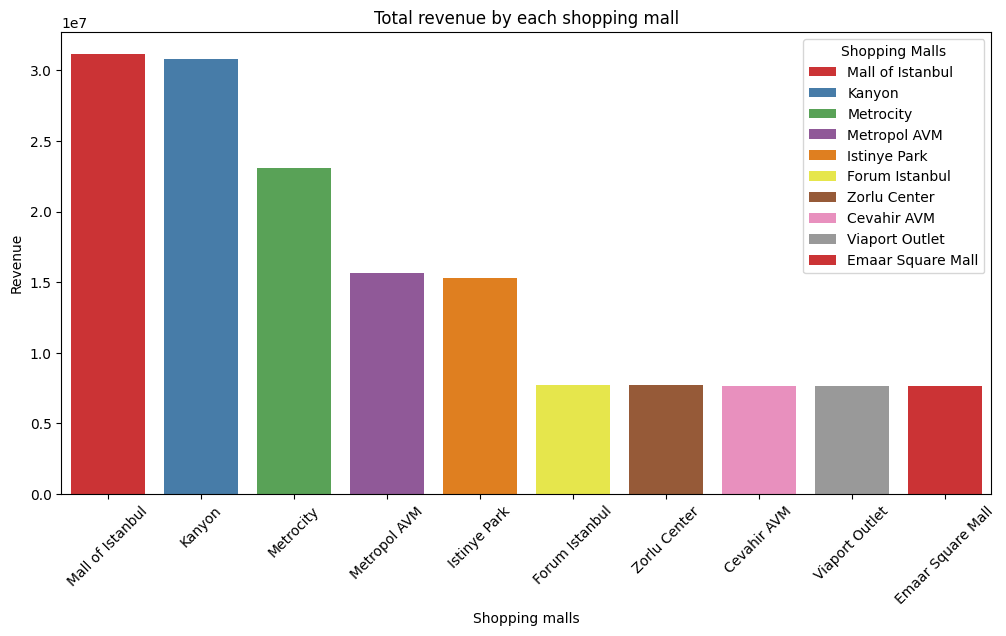

In [22]:
revenue_by_each_mall = final_df.groupby('shopping_mall')['Total_price'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6)) 
colors = sns.color_palette("Set1", len(revenue_by_each_mall))
bars = sns.barplot(x = revenue_by_each_mall['shopping_mall'], y = revenue_by_each_mall['Total_price'], hue = revenue_by_each_mall['shopping_mall'],palette=colors)
plt.title("Total revenue by each shopping mall")
plt.xlabel("Shopping malls")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.legend(bars.patches,revenue_by_each_mall['shopping_mall'], title="Shopping Malls", loc="upper right")
plt.show()

### 2. Total revenue generated by each category and year

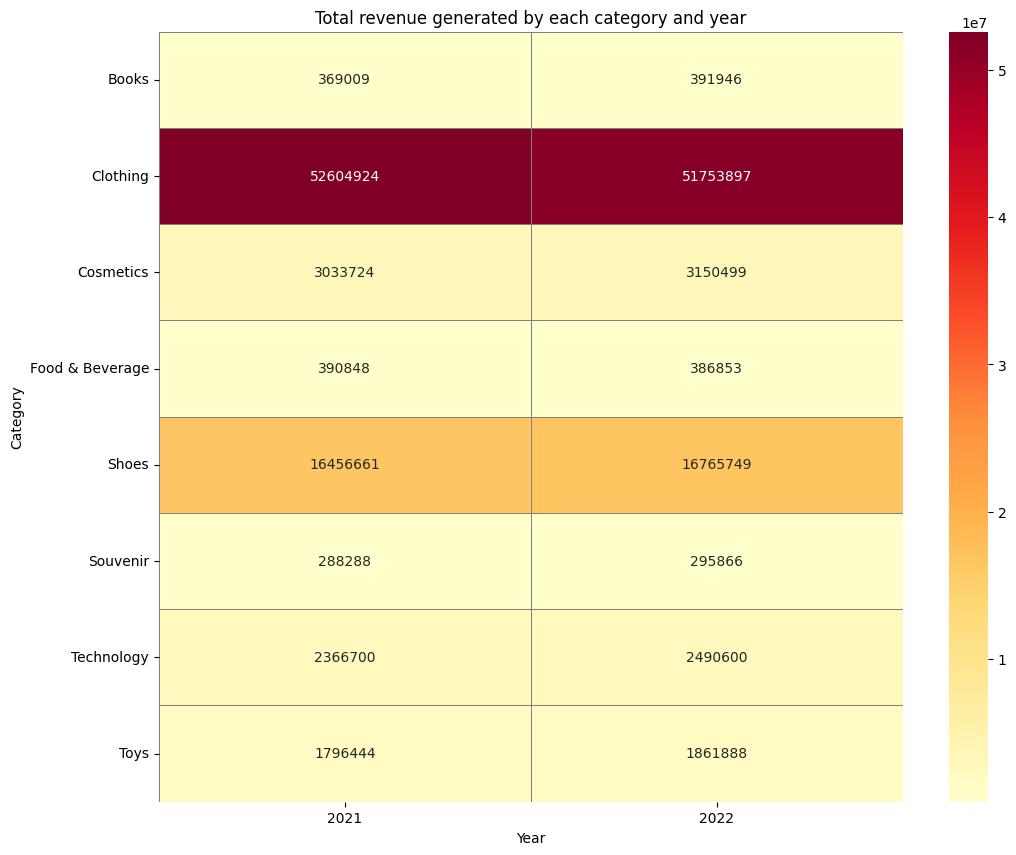

In [23]:
category_year_matrix = final_df.pivot_table(index = 'category', columns = final_df['year'] , values = 'Total_price' ,aggfunc = 'sum')

plt.figure(figsize = (12,10))
sns.heatmap(category_year_matrix, cmap='YlOrRd', annot=True, fmt=".0f", linewidths=0.5,linecolor = 'gray')
plt.title("Total revenue generated by each category and year")
plt.xlabel("Year")
plt.ylabel("Category")
plt.yticks(rotation=0)
plt.show()

### 3. Average price by category

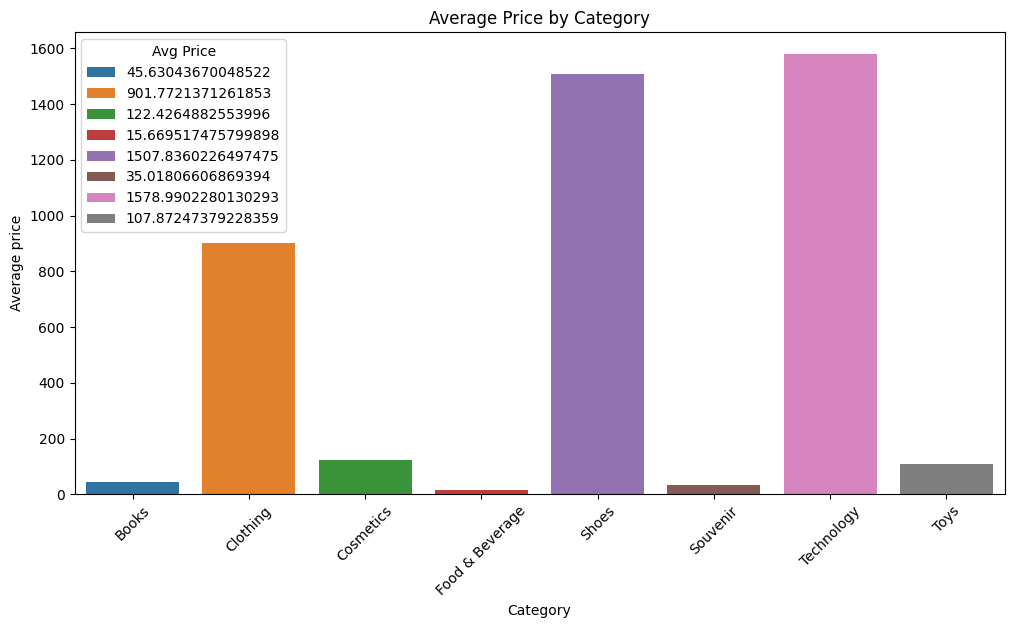

In [24]:
category_avg_price = final_df.groupby('category')['price'].mean().reset_index()

plt.figure(figsize=(12,6)) 
colors = sns.color_palette("Paired", len(category_avg_price))
bars = sns.barplot(x = category_avg_price['category'],y = category_avg_price['price'],hue =category_avg_price['category'])
plt.title('Average Price by Category')
plt.xlabel("Category")
plt.ylabel("Average price")
plt.xticks(rotation=45)
plt.legend(bars.patches,category_avg_price['price'],loc='upper left',title='Avg Price')
plt.show()

### 4. Monthly purchase trends for different categories

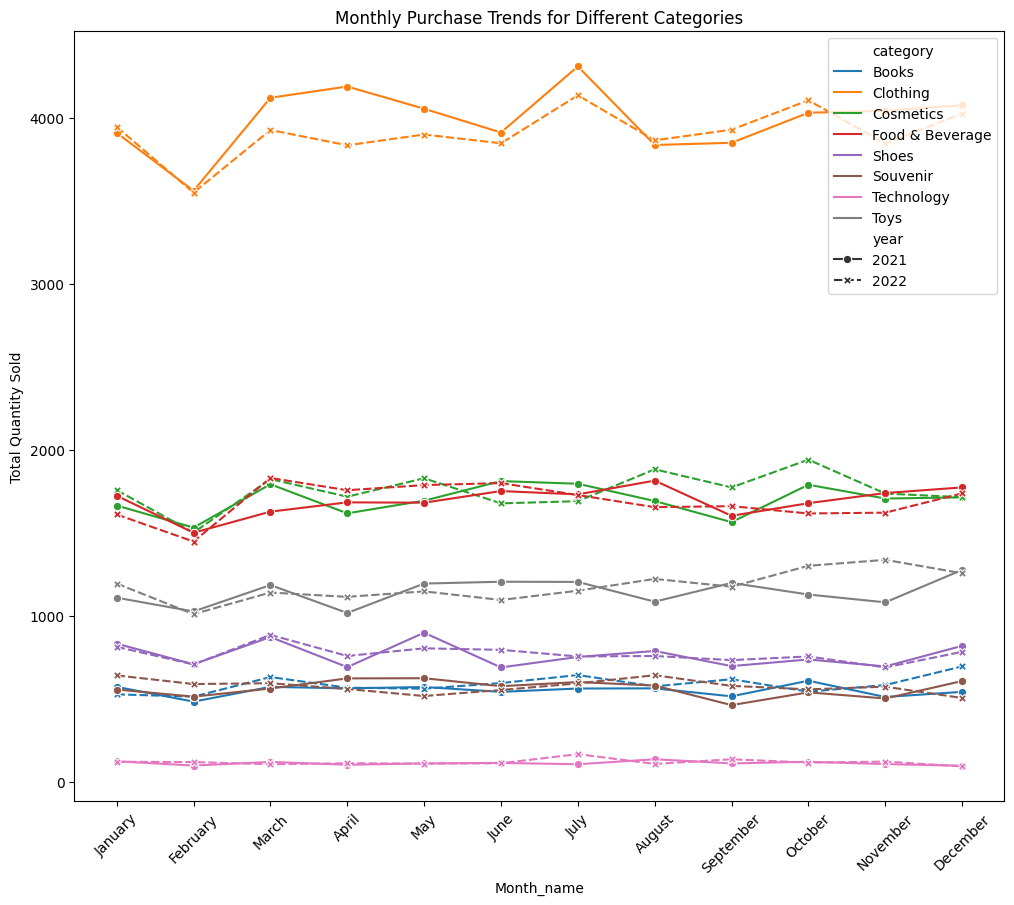

In [25]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_df['month_name'] = pd.Categorical(final_df['month_name'], categories=month_order, ordered=True)

category_trends = final_df.groupby(['year', 'month_name', 'category'])['quantity'].sum().reset_index()

plt.figure(figsize=(12, 10))
sns.lineplot(x='month_name', y='quantity', hue='category', style='year', data=category_trends, markers=True)
plt.title("Monthly Purchase Trends for Different Categories")
plt.xlabel("Month_name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 5. Age group distribution across shopping malls

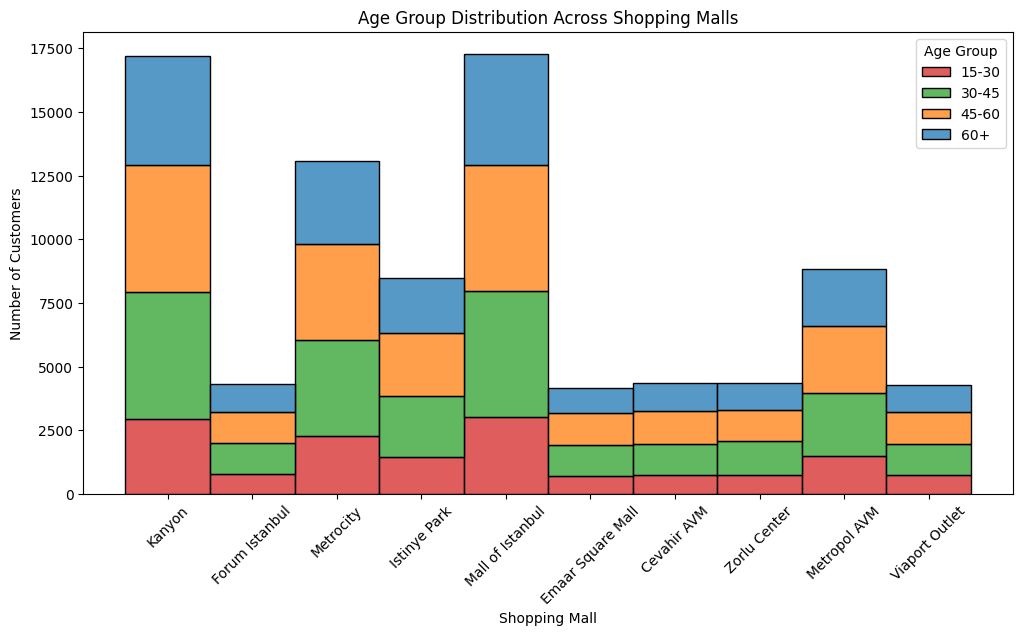

In [26]:
age_groups = pd.cut(final_df["age"], bins=[15, 30, 45, 60, 80], labels=["15-30", "30-45", "45-60", "60+"])

plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x="shopping_mall", hue=age_groups, multiple="stack")
plt.title("Age Group Distribution Across Shopping Malls")
plt.xlabel("Shopping Mall")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.legend(title="Age Group", labels=["15-30", "30-45", "45-60", "60+"])

plt.show()


### 6. Revenue share by gender and payment method

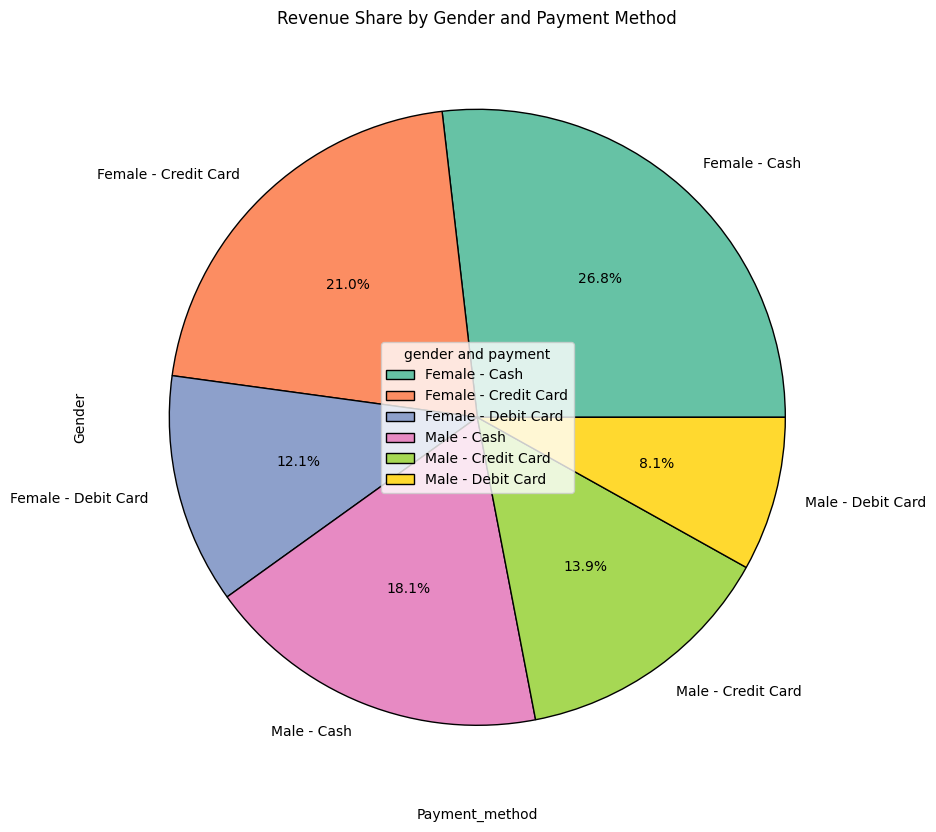

In [27]:
gender_payment_revenue = final_df.groupby(['gender', 'payment_method'])['Total_price'].sum().reset_index()
gender_payment_revenue['comb_col'] = gender_payment_revenue['gender']+' - '+ gender_payment_revenue['payment_method']
labels = gender_payment_revenue['comb_col'].to_list()

plt.figure(figsize=(10, 10))
colors = sns.color_palette("Set2", len(gender_payment_revenue))
plt.pie(gender_payment_revenue['Total_price'], labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'},colors=colors)
plt.title('Revenue Share by Gender and Payment Method')
plt.xlabel('Payment_method')
plt.ylabel('Gender')
plt.legend(loc='center',title = 'gender and payment')
plt.show()